In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('/content/human_cognitive_performance.csv')


In [ ]:
# Mostrar las primeras 5 filas
print("Primeras filas del dataset:")
df.head()

Primeras filas del dataset:


,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78


In [ ]:
print("\nInformación general del dataset:")
df.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             80000 non-null  object 
 1   Age                 80000 non-null  int64  
 2   Gender              80000 non-null  object 
 3   Sleep_Duration      80000 non-null  float64
 4   Stress_Level        80000 non-null  int64  
 5   Diet_Type           80000 non-null  object 
 6   Daily_Screen_Time   80000 non-null  float64
 7   Exercise_Frequency  80000 non-null  object 
 8   Caffeine_Intake     80000 non-null  int64  
 9   Reaction_Time       80000 non-null  float64
 10  Memory_Test_Score   80000 non-null  int64  
 11  Cognitive_Score     80000 non-null  float64
 12  AI_Predicted_Score  80000 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 7.9+ MB


In [ ]:
print("Cantidad de valores nulos por columna:")
print(df.isnull().sum())

Cantidad de valores nulos por columna:
User_ID               0
Age                   0
Gender                0
Sleep_Duration        0
Stress_Level          0
Diet_Type             0
Daily_Screen_Time     0
Exercise_Frequency    0
Caffeine_Intake       0
Reaction_Time         0
Memory_Test_Score     0
Cognitive_Score       0
AI_Predicted_Score    0
dtype: int64


In [ ]:
df.head(10)

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78
5,U6,36,Female,7.4,10,Vegan,6.6,Low,381,453.43,70,31.71,32.77
6,U7,48,Male,6.7,2,Vegan,1.4,Low,39,407.13,51,59.17,55.92
7,U8,35,Female,6.0,1,Vegan,6.8,Medium,2,298.46,60,85.02,81.45
8,U9,29,Male,5.1,6,Non-Vegetarian,10.2,Low,244,380.08,82,50.67,54.17
9,U10,57,Female,7.9,9,Non-Vegetarian,9.1,High,355,417.96,54,44.39,43.88


## Gráficos


### Distribucción de Cognitive_Score

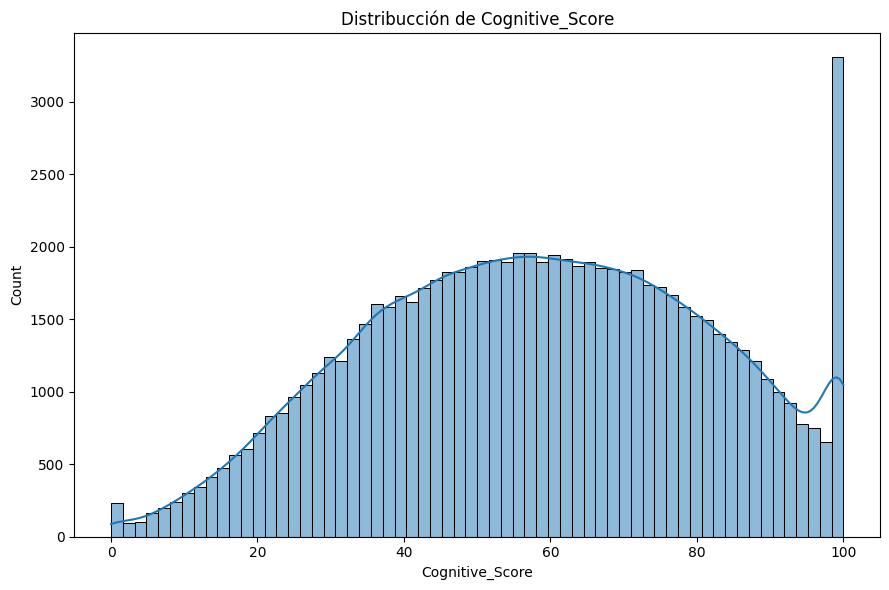

In [ ]:
plt.figure(figsize=(9,6))
sns.histplot(df['Cognitive_Score'],kde=True)
plt.title("Distribucción de Cognitive_Score")
plt.tight_layout()
plt.show()

### Distribución de edades

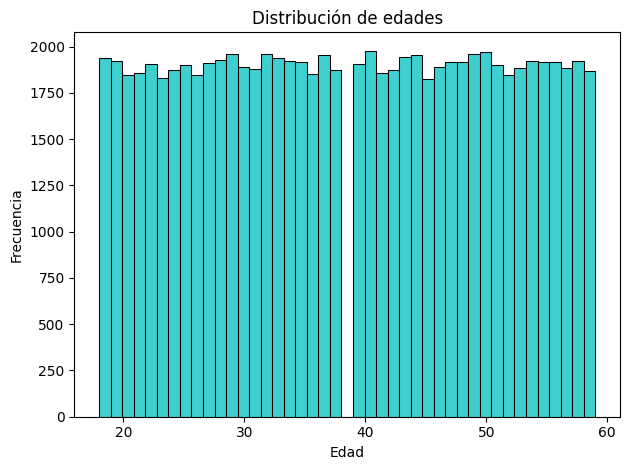

In [ ]:
sns.histplot(df["Age"], color='c')
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

### Relación entre Puntuación cognitiva y Nivel de estres

<ipython-input-48-f9b4d8890952>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stress_Level', y='Cognitive_Score', data=df, palette='coolwarm')


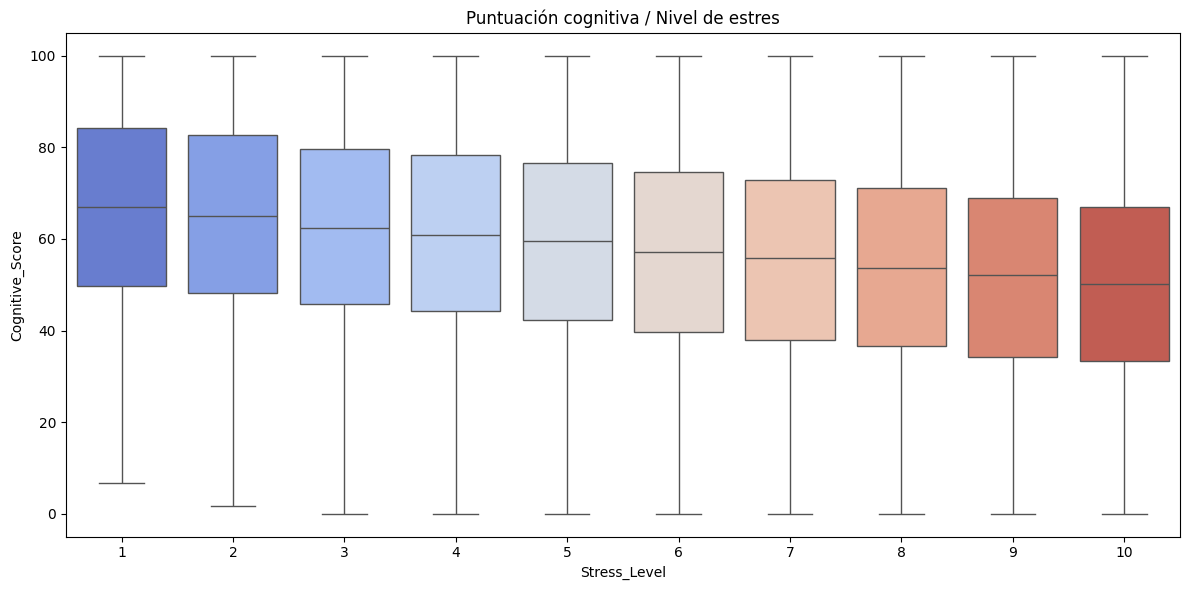

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Stress_Level', y='Cognitive_Score', data=df, palette='coolwarm')
plt.title("Puntuación cognitiva / Nivel de estres")
plt.tight_layout()
plt.show()

### Relación entre horas de sueño y puntuación cognitiva

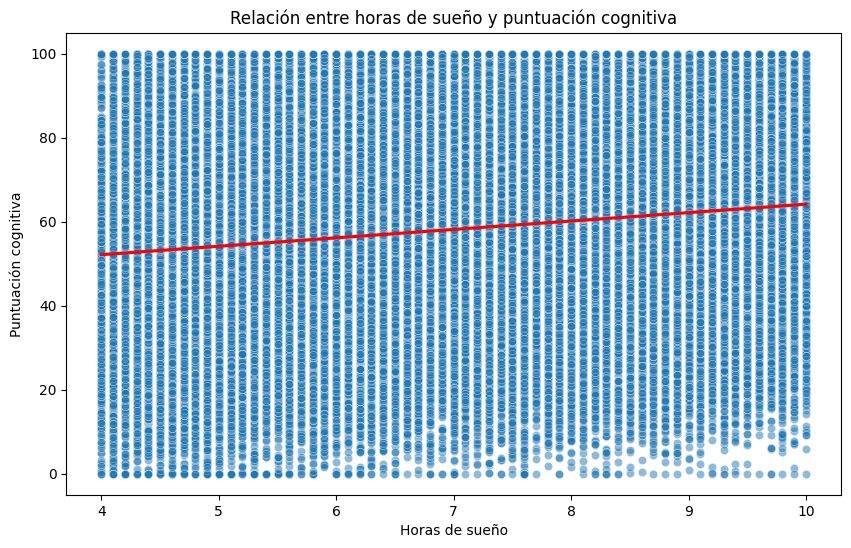

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sleep_Duration', y='Cognitive_Score', alpha=0.5)
sns.regplot(data=df, x='Sleep_Duration', y='Cognitive_Score', scatter=False, color='red')
plt.title('Relación entre horas de sueño y puntuación cognitiva')
plt.xlabel('Horas de sueño')
plt.ylabel('Puntuación cognitiva')
plt.show()


### Relación entre frecuencia de ejercicio y puntuación cognitiva

<ipython-input-50-098ae8e8b8fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exercise_Frequency', y='Cognitive_Score', palette='Set2')


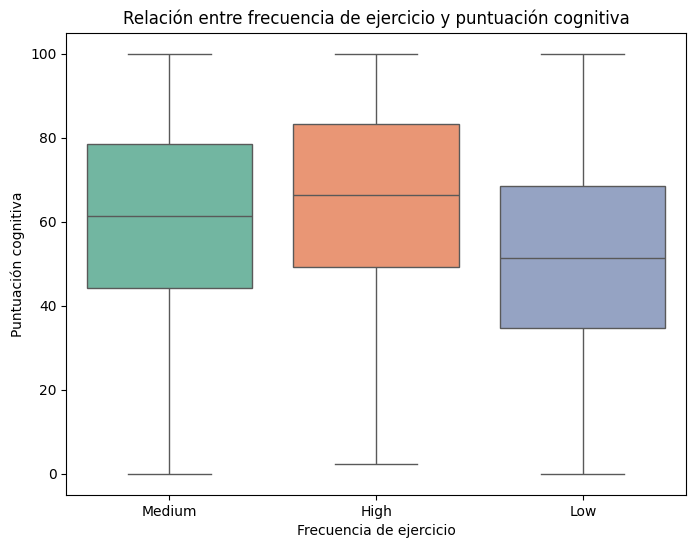

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Exercise_Frequency', y='Cognitive_Score', palette='Set2')
plt.title('Relación entre frecuencia de ejercicio y puntuación cognitiva')
plt.xlabel('Frecuencia de ejercicio')
plt.ylabel('Puntuación cognitiva')

plt.show()

### Distribución de genero por tipo de dieta

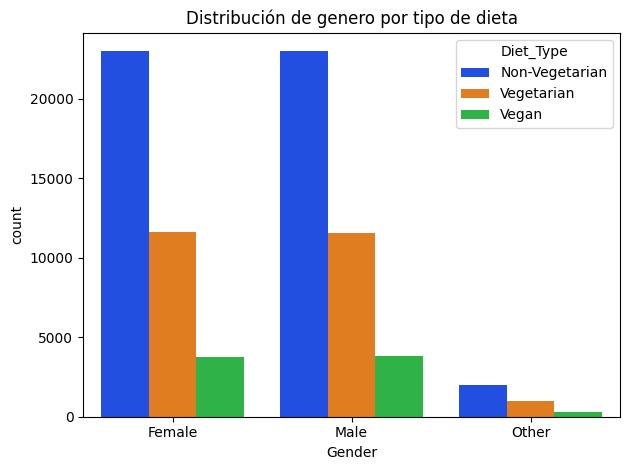

In [ ]:
sns.countplot(x=df["Gender"],hue=df['Diet_Type'],palette="bright")
plt.title('Distribución de genero por tipo de dieta')
plt.tight_layout()
plt.show()

### Distribución por género

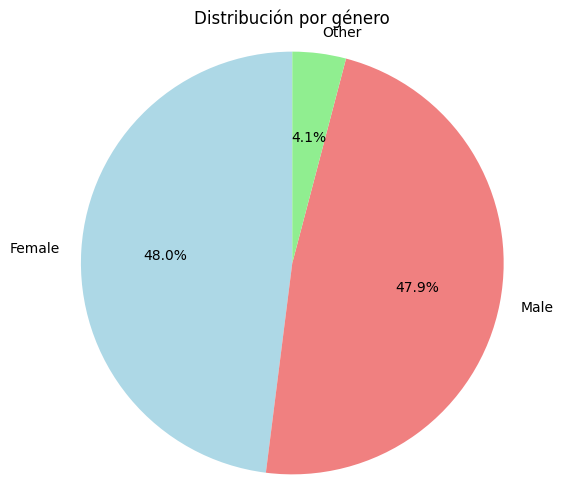

In [ ]:
genero_counts = df['Gender'].value_counts()

labels = genero_counts.index
sizes = genero_counts.values
colors = ['lightblue', 'lightcoral', 'lightgreen']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribución por género')
plt.axis('equal')
plt.show()


## Transformar las variables categçoricas a numéricas

In [ ]:
# Hacemos una copia del DataFrame original para no modificarlo directamente
df_encoded = df.copy()

# Identificamos las columnas categóricas
categorical_cols = ['Gender', 'Diet_Type', 'Exercise_Frequency']

# Aplicamos LabelEncoder a cada una
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Guardamos el encoder por si se quioere invertir la codificación después


In [ ]:
df_encoded.head(10)

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,U1,57,0,6.5,3,0,6.5,2,41,583.33,65,36.71,39.77
1,U2,39,0,7.6,9,0,10.8,0,214,368.24,58,54.35,57.68
2,U3,26,1,8.2,6,2,5.7,1,429,445.21,49,32.57,29.54
3,U4,32,1,7.8,9,2,8.3,1,464,286.33,94,70.15,74.59
4,U5,50,1,9.7,2,0,11.3,2,365,237.65,62,87.54,91.78
5,U6,36,0,7.4,10,1,6.6,1,381,453.43,70,31.71,32.77
6,U7,48,1,6.7,2,1,1.4,1,39,407.13,51,59.17,55.92
7,U8,35,0,6.0,1,1,6.8,2,2,298.46,60,85.02,81.45
8,U9,29,1,5.1,6,0,10.2,1,244,380.08,82,50.67,54.17
9,U10,57,0,7.9,9,0,9.1,0,355,417.96,54,44.39,43.88


## Escalar las variables para una mejor prediccion haciendola más eficaz

In [ ]:
# Columnas a escalar
columns_to_scale = [
    'Age', 'Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time',
    'Caffeine_Intake', 'Reaction_Time', 'Memory_Test_Score'
]

# Aplicar escalado
scaler = StandardScaler()
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])


## Eliminar columnas innnecesarias en la predicción

In [ ]:

df_encoded=df_encoded.drop(columns=['User_ID', 'AI_Predicted_Score'])

In [ ]:
# Mostramos las primeras filas codificadas
df_encoded.head()

,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score
0,1.526589,0,-0.291355,-0.870335,0,-0.001467,2,-1.438956,1.589309,-0.259937,36.71
1,0.039207,0,0.342862,1.223694,0,1.356263,0,-0.242064,-0.275063,-0.664431,54.35
2,-1.035013,1,0.688798,0.176679,2,-0.254068,1,1.245402,0.392103,-1.184496,32.57
3,-0.539219,1,0.458174,1.223694,2,0.566885,1,1.487548,-0.985048,1.415826,70.15
4,0.948163,1,1.553638,-1.219340,0,1.514138,2,0.802622,-1.407000,-0.433292,87.54


## Separar los datos X variables que influyen en la predicción e Y variable a predecir

In [ ]:
X = df_encoded.drop(columns=['Cognitive_Score'])
y = df_encoded['Cognitive_Score']

## Separar los datos en entrenamiento y testing 80% y 20% respectivamente

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Crear el modelo de la Red Neuronal

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

## Entrenar el modelo con 30 vueltas

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=128)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1673.3014 - mae: 31.4925 - val_loss: 72.0642 - val_mae: 6.6849
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 116.4842 - mae: 8.5242 - val_loss: 32.1384 - val_mae: 4.5010
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 78.2585 - mae: 6.8910 - val_loss: 14.5632 - val_mae: 2.9577
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 64.3007 - mae: 6.1530 - val_loss: 9.4283 - val_mae: 2.2881
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 56.8838 - mae: 5.7595 - val_loss: 6.2645 - val_mae: 1.6610
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 52.5002 - mae: 5.4924 - val_loss: 5.4934 - val_mae: 1.7241
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 49.9587 - mae: 5.3289 - val_loss: 3.6596 - val_mae: 1.1955
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 49.7068 - mae: 5.2771 - val_loss: 3.7966 - val_mae: 1.3938
Epoch 9/100
400/400 ━━━━━━━━━━━━━

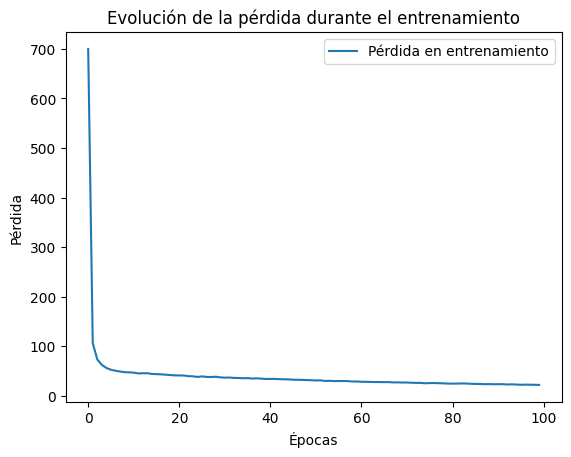

In [ ]:

plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

loss_alt, mae_alt = model.evaluate(X_test, y_test)
print(f"Modelo alternativo - MAE: {mae_alt:.2f} | MSE: {loss_alt:.2f}")

# Obtener predicciones del modelo neuronal
y_pred_ann = model.predict(X_test)
r2_ann = r2_score(y_test, y_pred_ann)
print(f"R² Score (Red Neuronal): {r2_ann:.2f}")


500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7933 - mae: 0.7221
Modelo alternativo - MAE: 0.72 | MSE: 0.80
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
R² Score (Red Neuronal): 1.00


### Guardamos el modelo

In [ ]:

model.export("modelo_cognitivo")

Saved artifact at 'modelo_cognitivo'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132175556942480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132175556939408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132175556943824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132175556945168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132175556939216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132175556948432: TensorSpec(shape=(), dtype=tf.resource, name=None)


### Creamos unos datos para predeccir el nivel cognitivo

In [ ]:
print(X_train.columns.tolist())

['Age', 'Gender', 'Sleep_Duration', 'Stress_Level', 'Diet_Type', 'Daily_Screen_Time', 'Exercise_Frequency', 'Caffeine_Intake', 'Reaction_Time', 'Memory_Test_Score']


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Entrenar modelo de regresión
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predecir
y_pred = reg.predict(X_test)

# Evaluar
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")




MAE: 5.68
MSE: 35.80
R² Score: 0.93


In [ ]:

nuevo_usuario = np.array([[57, 0, 6.5,3, 0, 6.5, 2, 41, 583.33, 65]])


columnas_a_escalar = ['Age', 'Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time',
                      'Caffeine_Intake', 'Reaction_Time', 'Memory_Test_Score']

df_usuario = pd.DataFrame(nuevo_usuario, columns=X_train.columns)

df_usuario[columnas_a_escalar] = scaler.transform(df_usuario[columnas_a_escalar])

pred = model.predict(df_usuario.values)
print(f"Puntuación cognitiva estimada (Red neuronal): {pred[0][0]:.2f}")

pred = reg.predict(df_usuario)
print(f"Puntuación cognitiva estimada (Regresión Lineal): {pred[0]:.2f}")

print(f"Puntuación esperada: 36.71")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Puntuación cognitiva estimada (Red neuronal): 37.19
Puntuación cognitiva estimada (Regresión Lineal): 33.21
Puntuación esperada: 36.71


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
from keras.models import load_model

model = load_model("modelo_cognitivo.keras")
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,189 (114.02 KB)

 Trainable params: 9,729 (38.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,460 (76.02 KB)

None
